In [56]:
import copy

from utilities import energy_fun, update_energy, propose_flip, metropolis_rule
import numpy as np

import matplotlib.pyplot as plt

In [64]:
n_iters = 10000
q = 2
side = 30
N = side ** 2
energies = {}
magnetizations = {}
equilibrium_iters = 500

In [65]:
def metropolis(T):
    energies[T] = []
    magnetizations[T] = []
    ens = energies[T]
    mags = magnetizations[T]
    J = -np.ones((N, N))
    sigma = np.random.randint(0, q, N)
    energy = energy_fun(J, sigma)

    # run for some iterations to reach stationary distribution
    for _ in range(equilibrium_iters):
        index, val = propose_flip(J, sigma, q)
        delta_e = update_energy(J, sigma, index, val)
        if metropolis_rule(delta_e, T):
            sigma[index] = val
            energy += delta_e

    mags.append([int(sum(sigma == x)) for x in range(q)])
    ens.append(energy)

    for it in range(n_iters):
        index, val = propose_flip(J, sigma, q)
        delta_e = update_energy(J, sigma, index, val)

        nm = copy.copy(mags[-1])

        if metropolis_rule(delta_e, T):
            nm[sigma[index]] -= 1
            nm[val] += 1

            sigma[index] = val
            energy += delta_e

        mags.append(nm)
        ens.append(energy)

In [66]:
temps = np.arange(.01, 3, .02)
for t in temps:
    print(f"Computing {t}")
    metropolis(t)

Computing 0.01
Computing 0.03
Computing 0.049999999999999996
Computing 0.06999999999999999
Computing 0.08999999999999998
Computing 0.10999999999999997
Computing 0.12999999999999998
Computing 0.15
Computing 0.16999999999999998
Computing 0.18999999999999997
Computing 0.20999999999999996
Computing 0.22999999999999998
Computing 0.24999999999999997
Computing 0.26999999999999996
Computing 0.29
Computing 0.30999999999999994
Computing 0.32999999999999996
Computing 0.35
Computing 0.36999999999999994
Computing 0.38999999999999996
Computing 0.4099999999999999
Computing 0.42999999999999994
Computing 0.44999999999999996
Computing 0.4699999999999999
Computing 0.48999999999999994
Computing 0.5099999999999999
Computing 0.5299999999999999
Computing 0.5499999999999999
Computing 0.57
Computing 0.59
Computing 0.6099999999999999
Computing 0.6299999999999999
Computing 0.6499999999999999
Computing 0.6699999999999999
Computing 0.69
Computing 0.7099999999999999
Computing 0.7299999999999999
Computing 0.74999999

In [67]:
# for x in energies.values():
#     print(sum(x) / len(x))

print(len(temps))

avg_mags = dict()
for temp, m in magnetizations.items():
    avg_mags[temp] = sum([x[0] / N for x in m]) / n_iters

200


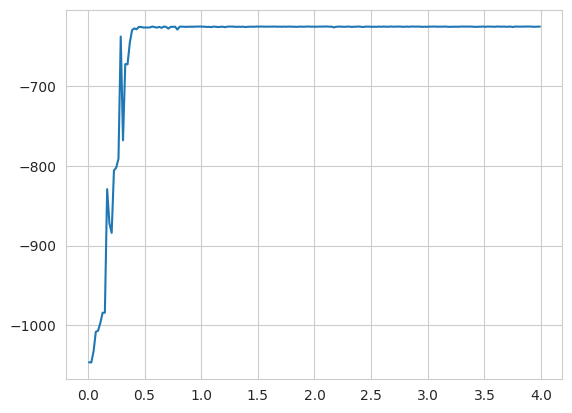

In [68]:
plt.plot(temps, [sum(x) / len(x) for x in energies.values()])

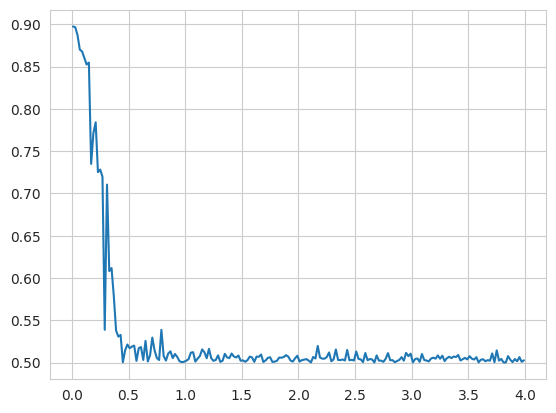

In [69]:
plt.plot(temps, [abs(x - .5) + .5 for x in avg_mags.values()])